# BraTS, 3D MRI segmentation using U-Net

## Data exploration, visualize segmentation masks

In [4]:
import os
BASE_IMG_PATH = '../data/Task01_BrainTumour/imagesTr/'
BASE_MASK_PATH = '../data/Task01_BrainTumour/labelsTr/'

In [5]:
# Append .. to path
import sys
sys.path.append('..')

In [6]:
!ls $BASE_IMG_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [7]:
!ls $BASE_MASK_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [8]:
import glob

In [9]:
all_img_paths = glob.glob(os.path.join(BASE_IMG_PATH,'*'))
# sort by filename
all_img_paths = sorted(all_img_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))
all_mask_paths = glob.glob(os.path.join(BASE_MASK_PATH,'*'))
# sort by filename
all_mask_paths = sorted(all_mask_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))

In [44]:
len(all_img_paths)

484

In [10]:
all_img_paths[:10], all_mask_paths[:10]

(['../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_007.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_008.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_009.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_010.nii.gz'],
 ['../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_007.nii.gz',
  '../data/Ta

In [11]:
all_img_paths[0], all_mask_paths[0]

('../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
 '../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz')

In [12]:
import numpy as np

In [13]:
from src import preprocess

In [14]:
test_img = preprocess.load_stacked_mri_img(all_img_paths[0])
test_images = preprocess.split_mri_img(test_img)
test_mask = preprocess.load_mask(all_mask_paths[0])

In [15]:
slice_idx = 90

In [16]:
import matplotlib.pyplot as plt

In [17]:
from src import constants
from src import viz

In [18]:
dims = test_images[0].shape
sagittal_mid = dims[0] // 2
coronal_mid = dims[1] // 2
axial_mid = dims[2] // 2
sagittal_mid, coronal_mid, axial_mid

(120, 120, 77)

Perspective 1, midpoint of sagittal plane


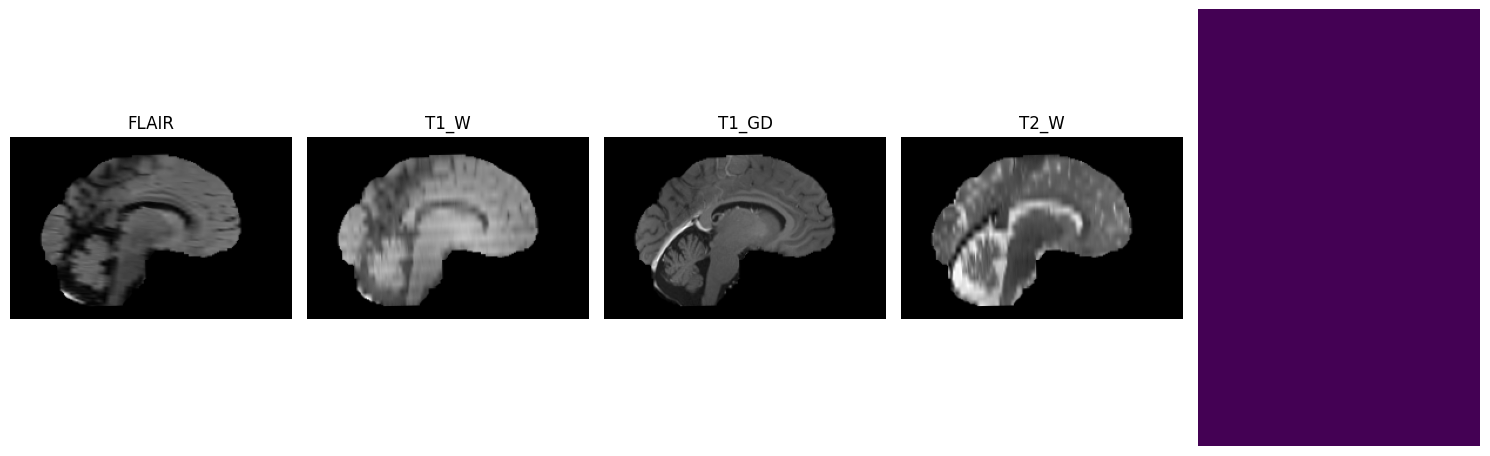

Perspective 2, midpoint of coronal plane


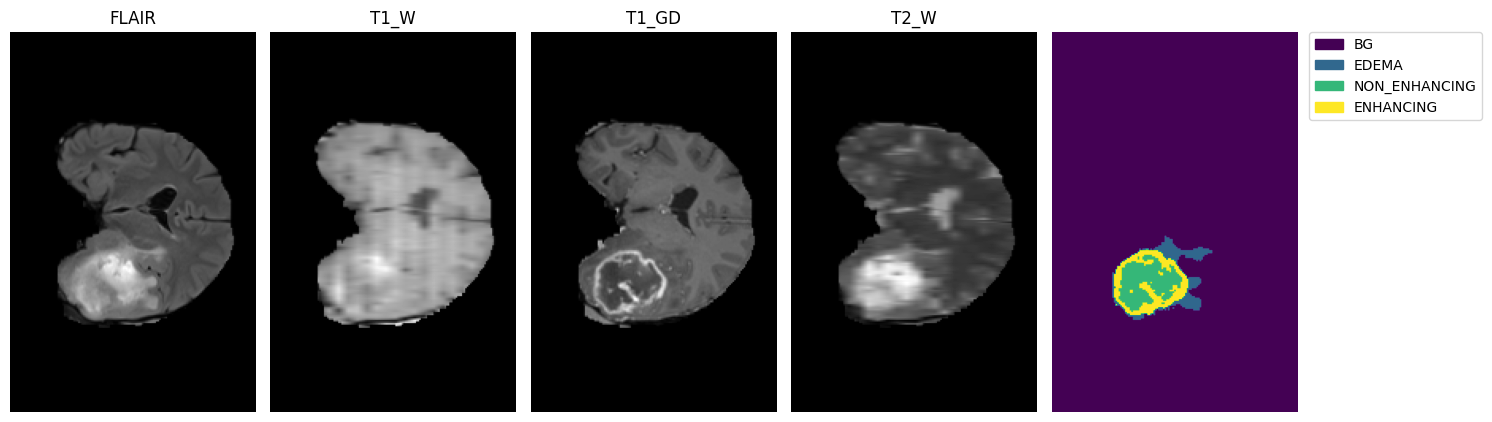

Perspective 3, midpoint of axial plane


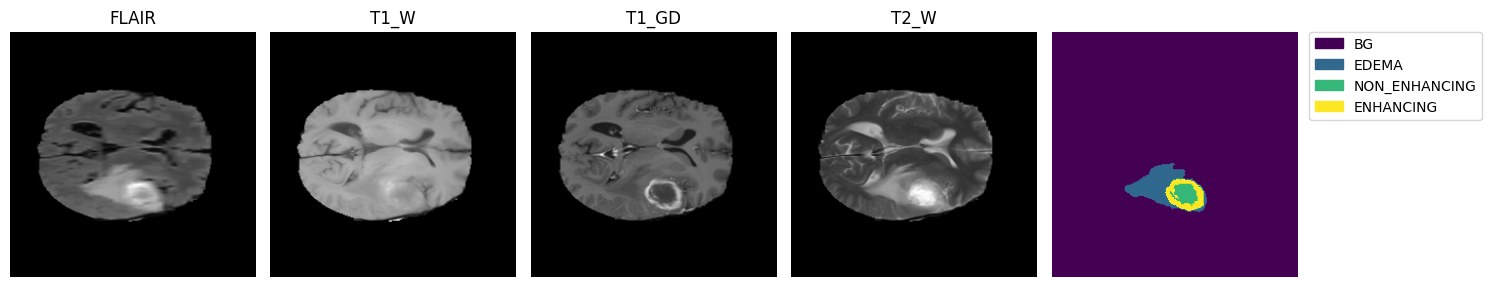

In [19]:
print("Perspective 1, midpoint of sagittal plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(np.rot90(img[sagittal_mid, :, :]), cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[sagittal_mid, :, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 2, midpoint of coronal plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(img[:, coronal_mid, :], cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[:, coronal_mid, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 3, midpoint of axial plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(img[:, :, axial_mid], cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[:, :, axial_mid], ax[-1])

plt.tight_layout()
plt.show()

In [20]:
from src import preprocess

In [21]:
aggregate_masks = preprocess.get_masks(test_mask)

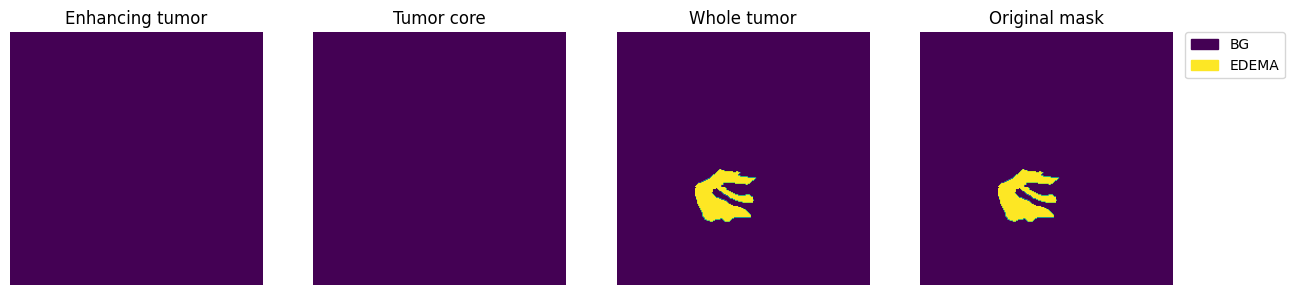

In [22]:
slice_idx = 90

viz.show_aggregate_masks(aggregate_masks, slice_idx, test_mask)

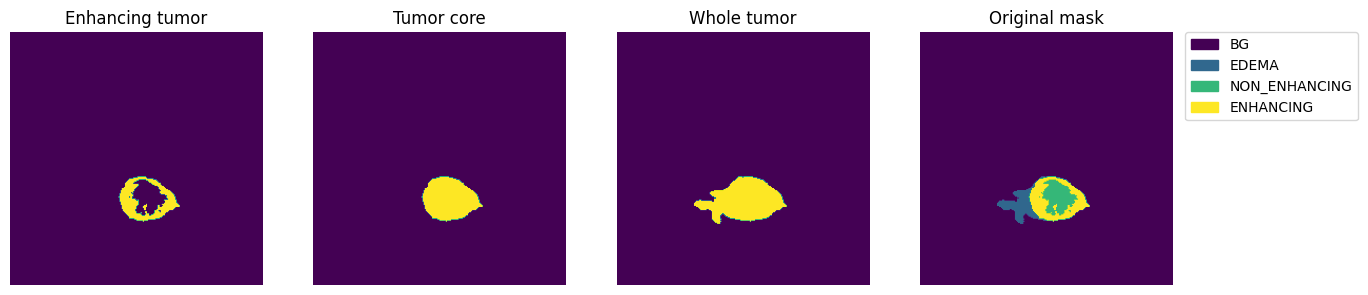

In [23]:
slice_idx = 60

viz.show_aggregate_masks(aggregate_masks, slice_idx, test_mask)

In [24]:
flair = test_images[constants.FLAIR]
t1_w = test_images[constants.T1_W]
t1_gd = test_images[constants.T1_GD]
t2_w = test_images[constants.T2_W]

Showing slice 60 without mask


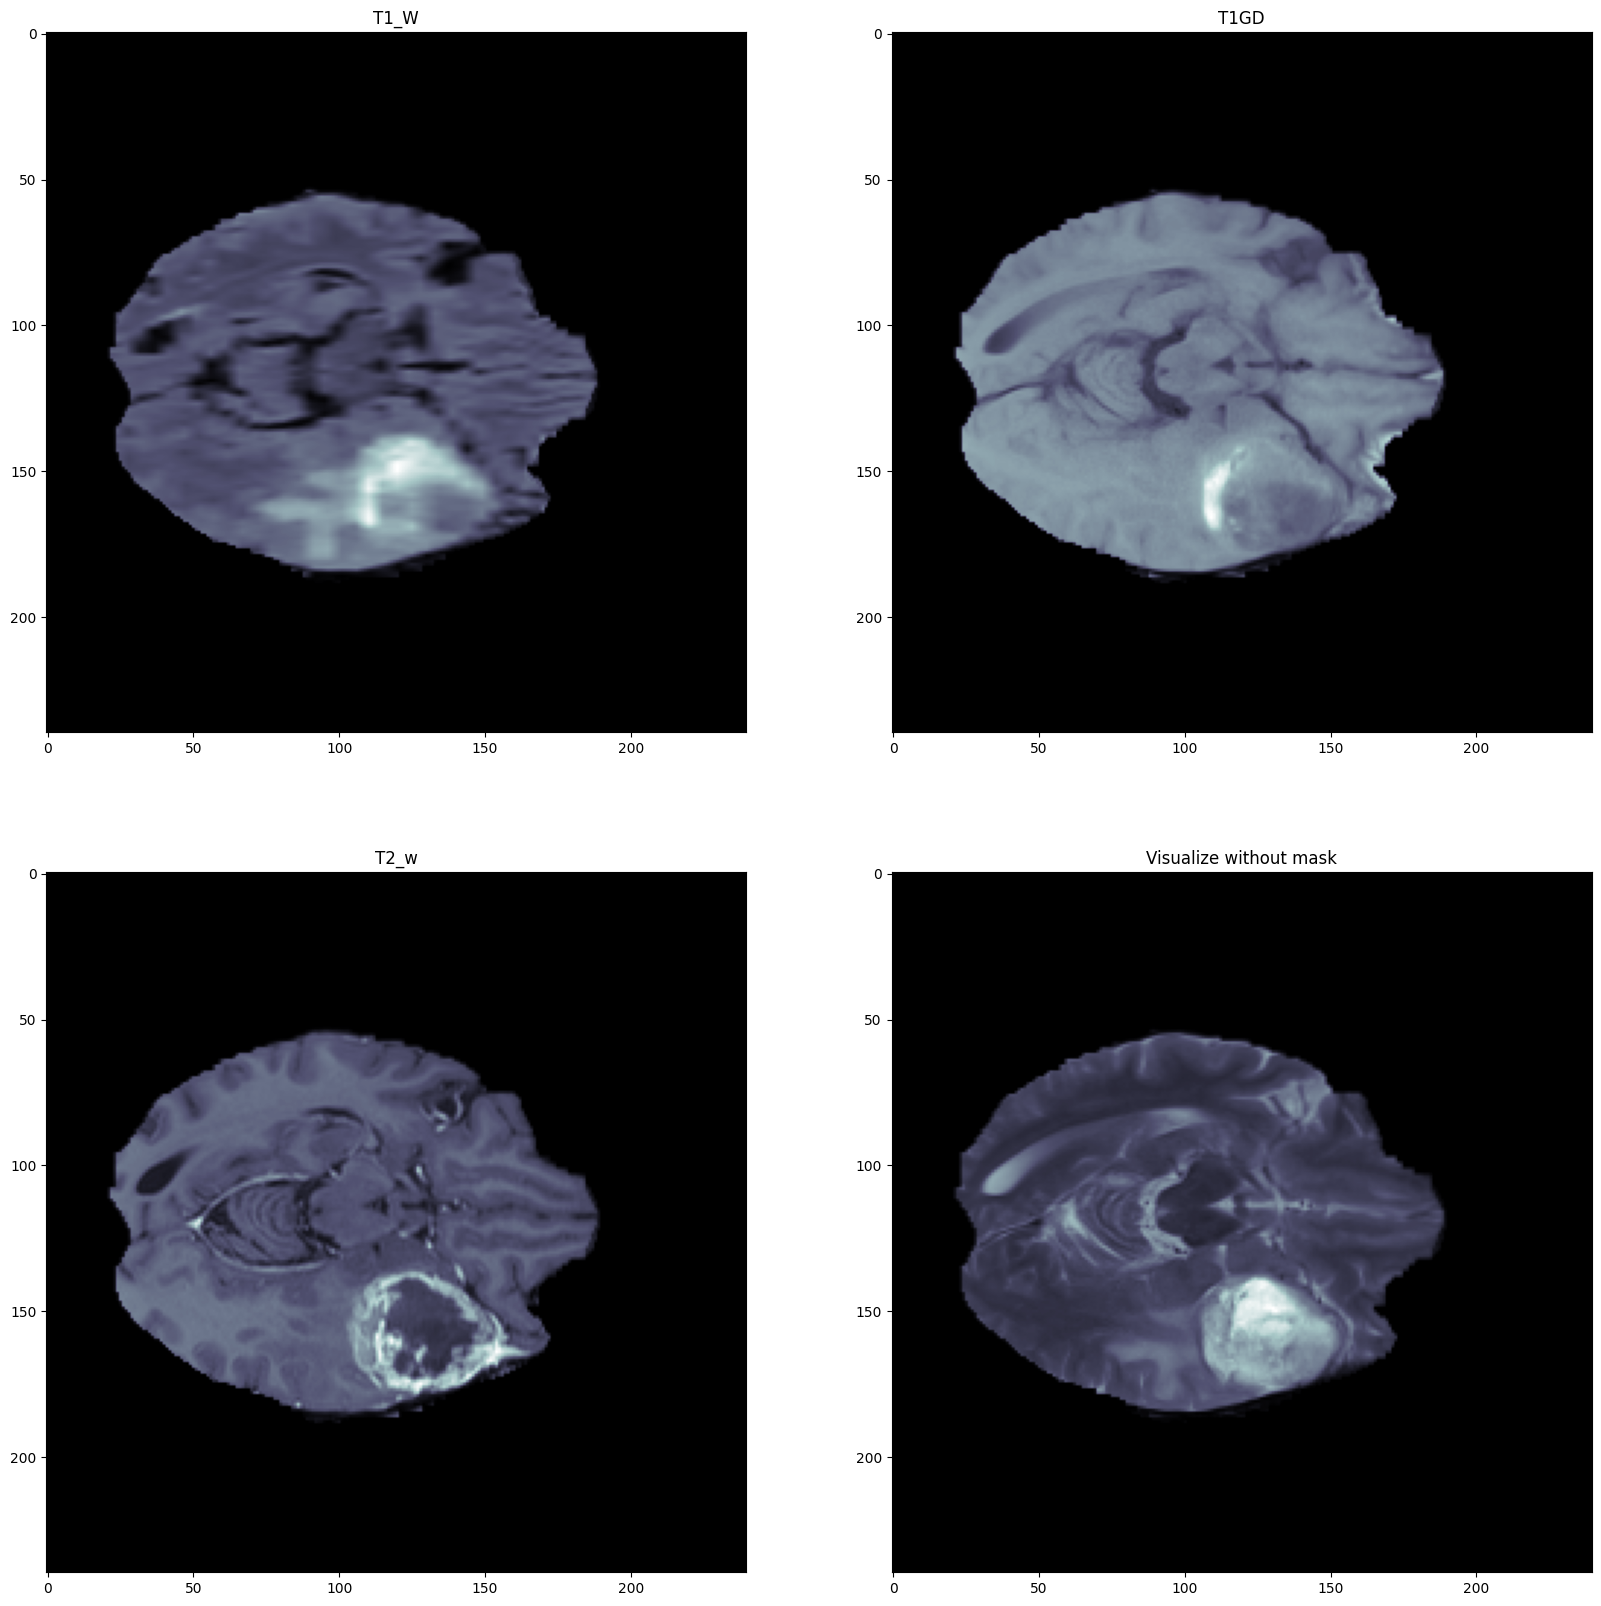

In [25]:
print(f"Showing slice {slice_idx} without mask")

fig, ax = plt.subplots(2, 2, figsize = (20, 20))

ax[1, 1].imshow(t2_w[:,:,slice_idx], cmap ='bone')
ax[1, 1].set_title('FLAIR')
ax[0, 0].imshow(flair[:, :, slice_idx], cmap ='bone')
ax[0, 0].set_title('T1_W')
ax[0, 1].imshow(t1_w[:, :, slice_idx], cmap ='bone')
ax[0, 1].set_title('T1GD')
ax[1, 0].imshow(t1_gd[: ,:,slice_idx], cmap ='bone')
ax[1, 0].set_title('T2_w')
plt.title("Visualize without mask")
plt.show()

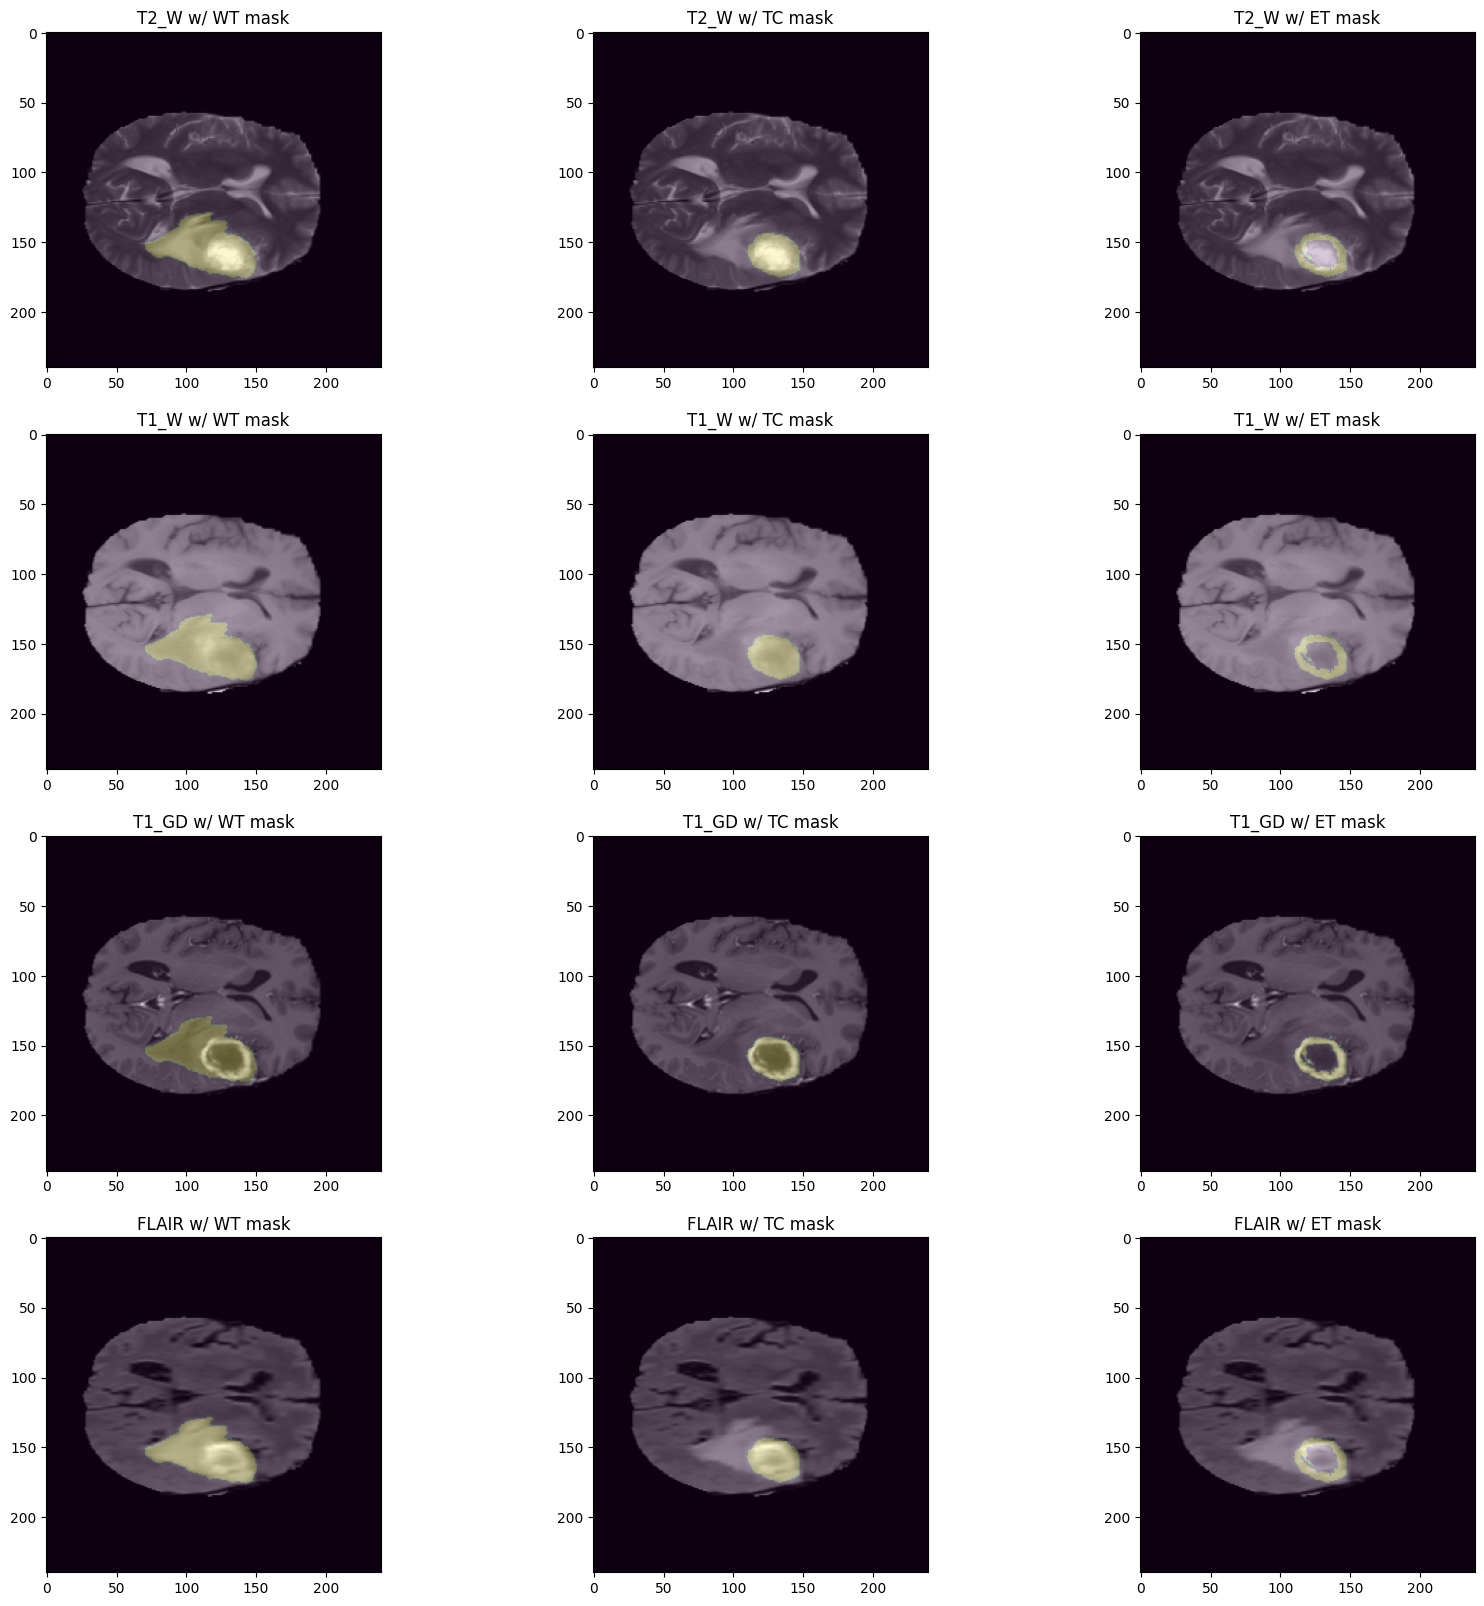

In [26]:
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax[0, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[0, 0].set_title('T2_W w/ WT mask')

ax[0, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[0, 1].set_title('T2_W w/ TC mask')

ax[0, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[0, 2].set_title('T2_W w/ ET mask')

ax[1, 0].imshow(t1_w[:, :, axial_mid], cmap ='gray')
ax[1, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 0].set_title('T1_W w/ WT mask')

ax[1, 1].imshow(t1_w[:, :, axial_mid], cmap ='gray')
ax[1, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 1].set_title('T1_W w/ TC mask')

ax[1, 2].imshow(t1_w[:, :, axial_mid], cmap ='gray')
ax[1, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 2].set_title('T1_W w/ ET mask')

ax[2, 0].imshow(t1_gd[:, :, axial_mid], cmap ='gray')
ax[2, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[2, 0].set_title('T1_GD w/ WT mask')

ax[2, 1].imshow(t1_gd[:, :, axial_mid], cmap ='gray')
ax[2, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[2, 1].set_title('T1_GD w/ TC mask')

ax[2, 2].imshow(t1_gd[:, :, axial_mid], cmap ='gray')
ax[2, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[2, 2].set_title('T1_GD w/ ET mask')

ax[3, 0].imshow(flair[:, :, axial_mid], cmap ='gray')
ax[3, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[3, 0].set_title('FLAIR w/ WT mask')

ax[3, 1].imshow(flair[:, :, axial_mid], cmap ='gray')
ax[3, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[3, 1].set_title('FLAIR w/ TC mask')

ax[3, 2].imshow(flair[:, :, axial_mid], cmap ='gray')
ax[3, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[3, 2].set_title('FLAIR w/ ET mask')

plt.show()

# Evaluation

Use a table to list the segmentation results (Dice score and Hausdorff Dist.) for each fold, as well as the average
results of 5-fold.

Evaluation:
background (label 0), necrotic and non-enhancing tumor (label 1), peritumoral edema (label 2) and GD-enhancing
tumor (label 4). The segmentation accuracy is measured by the Dice score and the Hausdorff distance (95%) metrics
for enhancing tumor region (ET, label 4), regions of the tumor core (TC, labels 1 and 4), and the whole tumor region
(WT, labels 1,2 and 4).
4) Present a few examples of your segmentation results (an example is given below) for qualitative analysis.

### Visualize results of model on some sample images

In [27]:
from src import unet2d
import importlib
import torch

In [70]:
def load_unet2d_model(model_path, device):
    model = unet2d.create_2d_unet()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    model.to(device)
    return model

In [71]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

path = '../models/first-run-unet2d/unet2d-fold-1.pth'
model1 = load_unet2d_model(path, device)

Show results for a sample slice

In [90]:
def get_pred_for_slice(model, image, slice_idx):
    image_slice = image[:, :, :, slice_idx]
    image_slice = torch.from_numpy(image_slice).float().to(device).unsqueeze(0)
    pred_logits = model(image_slice)

    output_slice = pred_logits.detach().cpu().numpy().squeeze(0)
    output_slice = preprocess.binarize_mask(output_slice)
    return output_slice

In [95]:
output_slice = get_pred_for_slice(model1, test_img, axial_mid)

torch.Size([1, 4, 240, 240])


In [96]:
agg_mask = preprocess.get_masks(test_mask)

Text(0.5, 1.0, 'T2_W w/ ET mask')

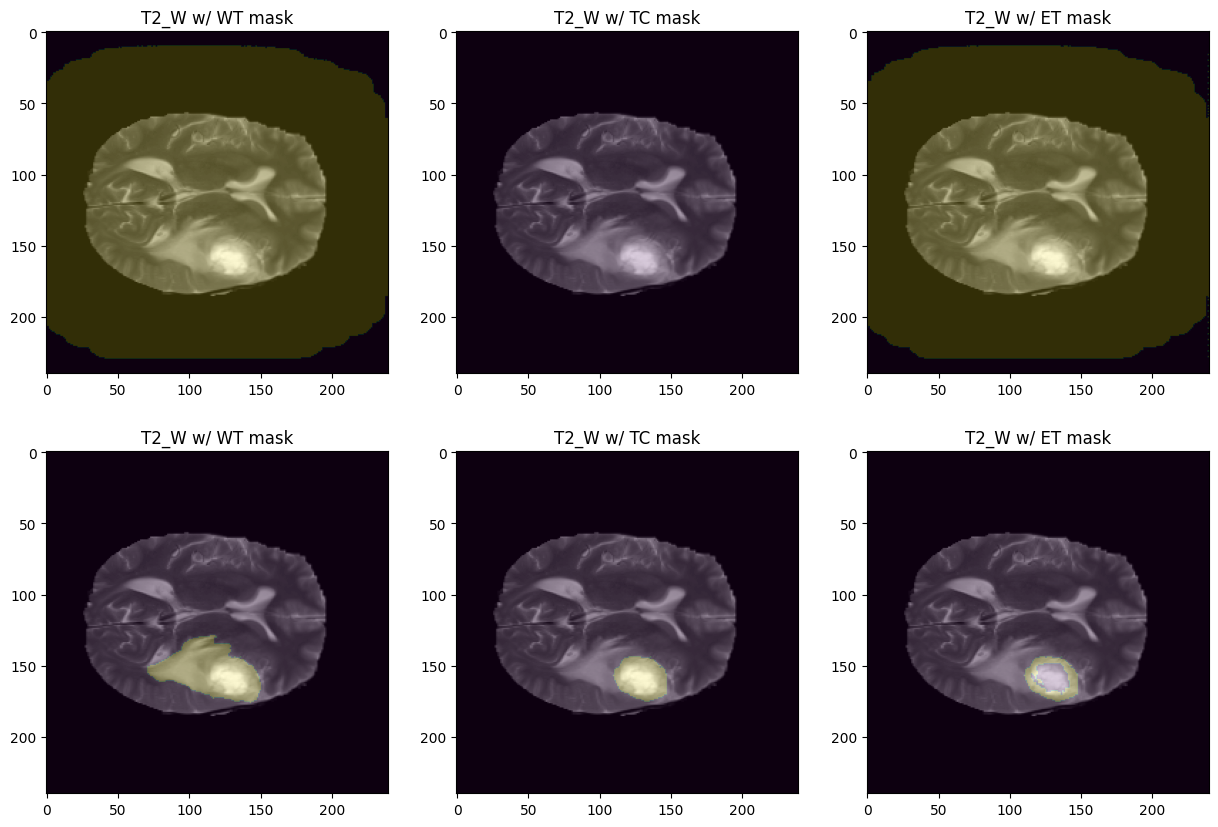

In [97]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 0].imshow(output_slice[constants.WT, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 0].set_title('T2_W w/ WT mask')

ax[0, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 1].imshow(output_slice[constants.TC, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 1].set_title('T2_W w/ TC mask')

ax[0, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 2].imshow(output_slice[constants.ET, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 2].set_title('T2_W w/ ET mask')

ax[1, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 0].imshow(agg_mask[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 0].set_title('T2_W w/ WT mask')

ax[1, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 1].imshow(agg_mask[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 1].set_title('T2_W w/ TC mask')

ax[1, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 2].imshow(agg_mask[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 2].set_title('T2_W w/ ET mask')


In [98]:
output_slice = get_pred_for_slice(model1, test_img, 50)

torch.Size([1, 4, 240, 240])


Text(0.5, 1.0, 'T2_W w/ ET mask')

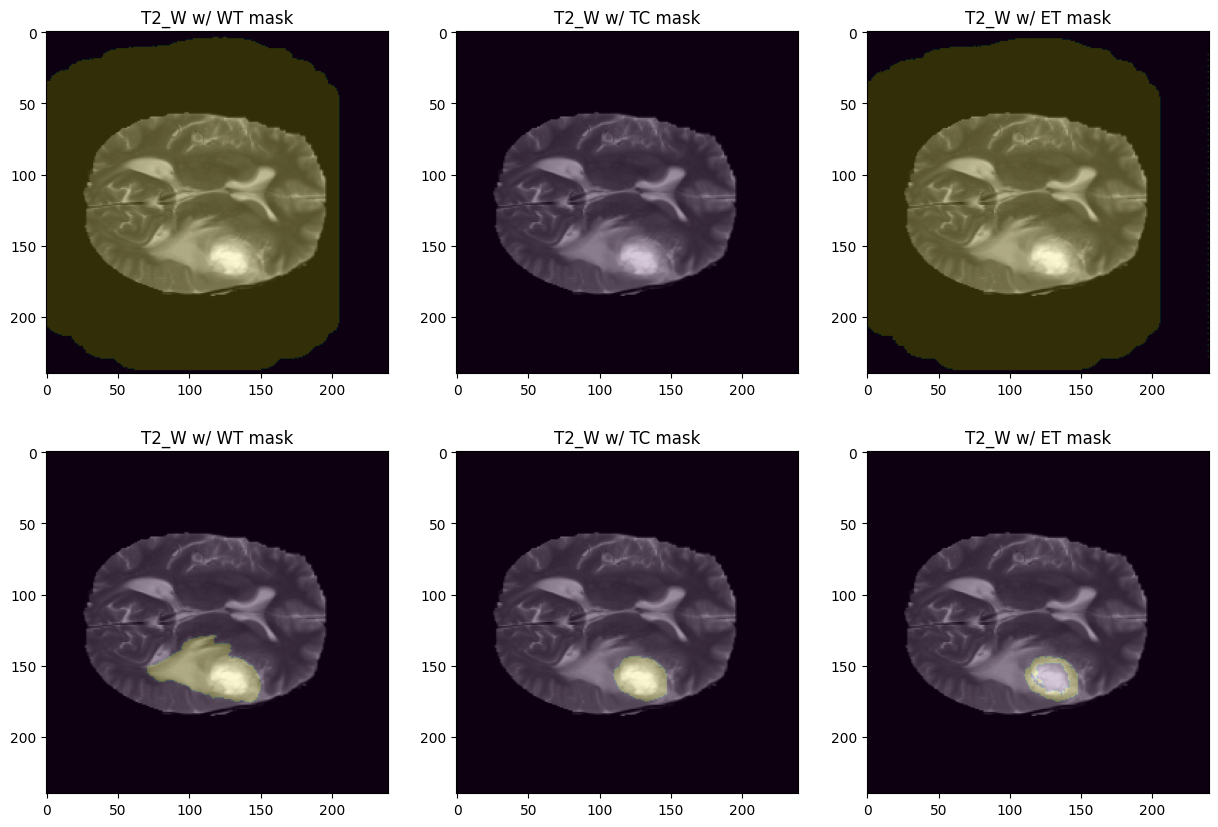

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 0].imshow(output_slice[constants.WT, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 0].set_title('T2_W w/ WT mask')

ax[0, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 1].imshow(output_slice[constants.TC, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 1].set_title('T2_W w/ TC mask')

ax[0, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 2].imshow(output_slice[constants.ET, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 2].set_title('T2_W w/ ET mask')

ax[1, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 0].imshow(agg_mask[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 0].set_title('T2_W w/ WT mask')

ax[1, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 1].imshow(agg_mask[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 1].set_title('T2_W w/ TC mask')

ax[1, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 2].imshow(agg_mask[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 2].set_title('T2_W w/ ET mask')


In [100]:
output_slice = get_pred_for_slice(model1, test_img, 25)

torch.Size([1, 4, 240, 240])


Text(0.5, 1.0, 'T2_W w/ ET mask')

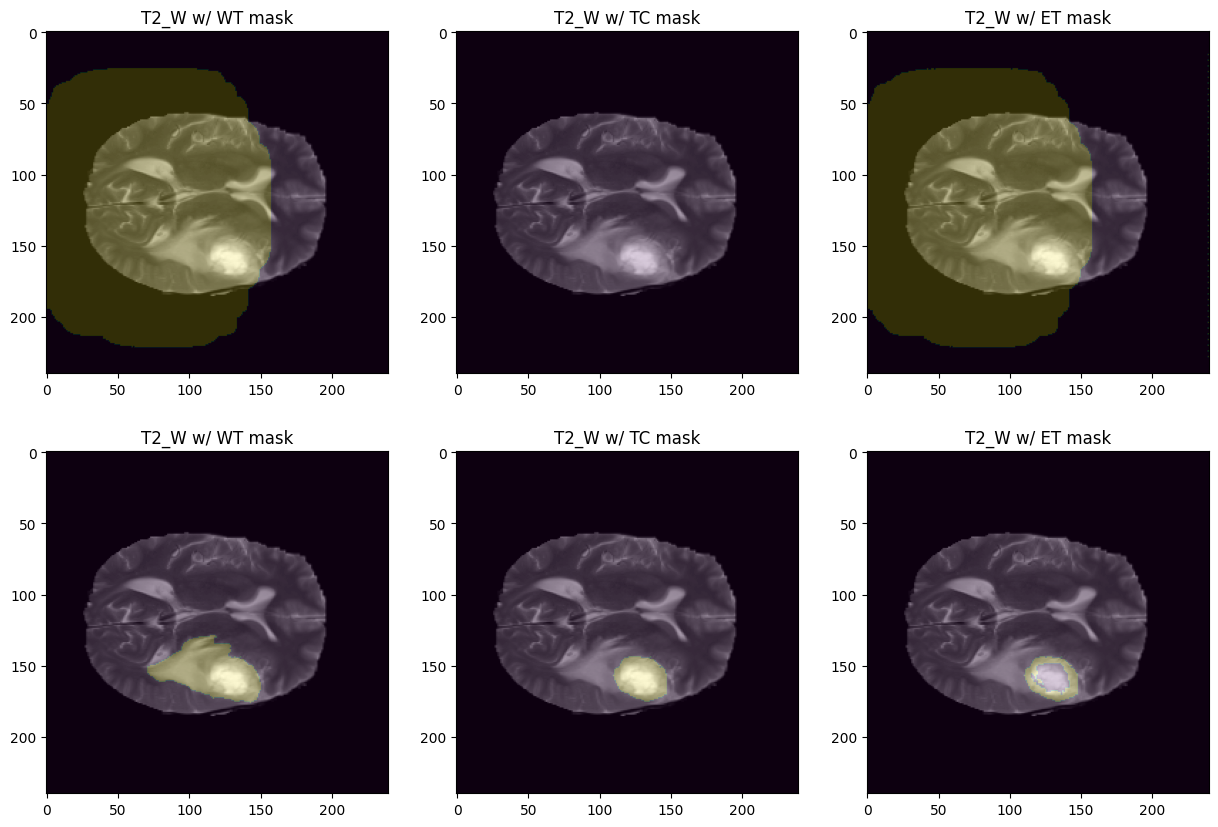

In [101]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 0].imshow(output_slice[constants.WT, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 0].set_title('T2_W w/ WT mask')

ax[0, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 1].imshow(output_slice[constants.TC, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 1].set_title('T2_W w/ TC mask')

ax[0, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[0, 2].imshow(output_slice[constants.ET, :, :], cmap ='viridis', alpha = 0.2)
ax[0, 2].set_title('T2_W w/ ET mask')

ax[1, 0].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 0].imshow(agg_mask[constants.WT, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 0].set_title('T2_W w/ WT mask')

ax[1, 1].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 1].imshow(agg_mask[constants.TC, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 1].set_title('T2_W w/ TC mask')

ax[1, 2].imshow(t2_w[:, :, axial_mid], cmap ='gray')
ax[1, 2].imshow(agg_mask[constants.ET, :, :, axial_mid], cmap ='viridis', alpha = 0.2)
ax[1, 2].set_title('T2_W w/ ET mask')


In [36]:
from medpy.metric import dc

## Evaluate scores on all images

In [62]:
def load_img_and_mask(img_path, mask_path, device):
    img = preprocess.load_stacked_mri_img(img_path)
    mask = preprocess.load_mask(mask_path)
    agg_mask = preprocess.get_masks(mask)

    img, mask = torch.from_numpy(test_img), torch.from_numpy(agg_mask)
    img, mask = img.float(), mask.float()
    img, mask = img.to(device), mask.to(device)
    return img, mask

In [68]:
from src import evaluate

In [69]:
def evaluate_model(model, img_paths, mask_paths, device):
    tc_dices = []
    wt_dices = []
    et_dices = []
    overall_dices = []
    hds = []
    hd_fulls = []
    img_num = 1
    for img_path, mask_path in zip(img_paths, mask_paths):
        print(f"Processing image {img_num}...")
        img_num += 1

        img, agg_mask = load_img_and_mask(img_path, mask_path, device)

        output_mask = []
        for i in range(img.shape[3]):
            # Get the current slice
            input_slice = img[:, :, :, i]
            target_slice = agg_mask[:, :, :, i]

            # Add singleton dimension
            input_slice = input_slice.unsqueeze(0)
            target_slice = target_slice.unsqueeze(0)

            # Perform forward pass
            output_logits = model(input_slice)

            output_slice = output_logits.detach().cpu().numpy().squeeze(0)
            output_slice = preprocess.binarize_mask(output_slice)

            output_mask.append(output_slice)

        # Convert to numpy array with shape (3, 240, 240, 155)
        output_mask = np.array(output_mask).transpose(1, 2, 3, 0)
        output_mask = preprocess.binarize_mask(output_mask)

        agg_mask = agg_mask.detach().cpu().numpy()

        tc_dice = dc(output_mask[constants.TC, :, :, :], agg_mask[constants.TC, :, :, :])
        wt_dice = dc(output_mask[constants.WT, :, :, :], agg_mask[constants.WT, :, :, :])
        et_dice = dc(output_mask[constants.ET, :, :, :], agg_mask[constants.ET, :, :, :])
        overall_dice, hd, hd_full = evaluate.compute_dice_and_hd(output_mask, agg_mask)

        tc_dices.append(tc_dice)
        wt_dices.append(wt_dice)
        et_dices.append(et_dice)
        overall_dices.append(overall_dice)
        hds.append(hd)
        hd_fulls.append(hd_full)
    
    return {
        'tc_dices': tc_dices,
        'wt_dices': wt_dices,
        'et_dices': et_dices,
        'overall_dices': overall_dices,
        'hds': hds,
        'hd_fulls': hd_fulls
    }

In [64]:
model1_results = evaluate_model(model1, all_img_paths, all_mask_paths, device)

Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Processing image 8...
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35...
Processing image 36...
Processing image 37...
Processing image 38...
Processing image 39...
Processing image 40...
Processing image 41...
Processing image 42...
Processing image 43...
Processing image 44.

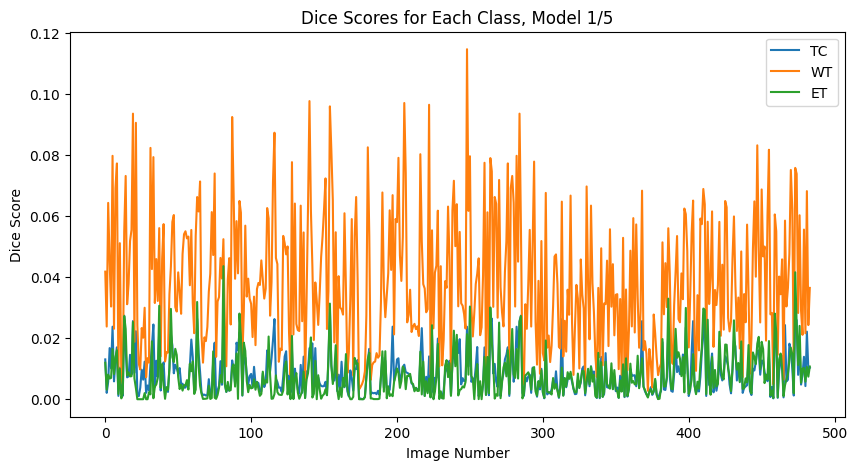

In [103]:
# Plot each dice score
plt.figure(figsize=(10, 5))
plt.plot(tc_dices, label='TC')
plt.plot(wt_dices, label='WT')
plt.plot(et_dices, label='ET')
plt.xlabel('Image Number')
plt.ylabel('Dice Score')
plt.title('Dice Scores for Each Class, Model 1/5')
plt.legend()
plt.savefig('../imgs/model1_dice_scores.png')